In [78]:
import random

import matplotlib.pyplot as plt
import numpy as np
import mcu
import cylinder_dataset_generator as cyl
from importlib import reload

reload(mcu)
reload(cyl)

<module 'cylinder_dataset_generator' from 'C:\\Users\\einkina\\Documents\\School\\Manifold Learning\\manifold-learning\\cylinder_dataset_generator.py'>

In [79]:
reload(cyl)
control_vars = cyl.get_control_vars(200)
response_matrix = cyl.generate_array_of_cylinders(control_vars, noise_level=0.05, num_points=200)
k = 2
c = 400
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = mcu.prepare_data(control_vars, response_matrix, k)
q = mcu.solve_semidefinite_programming(standardized_x, centered_y, edges, c)

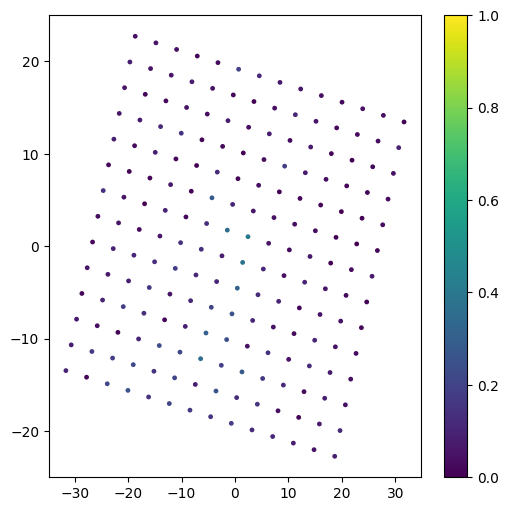

0.05859328187490628


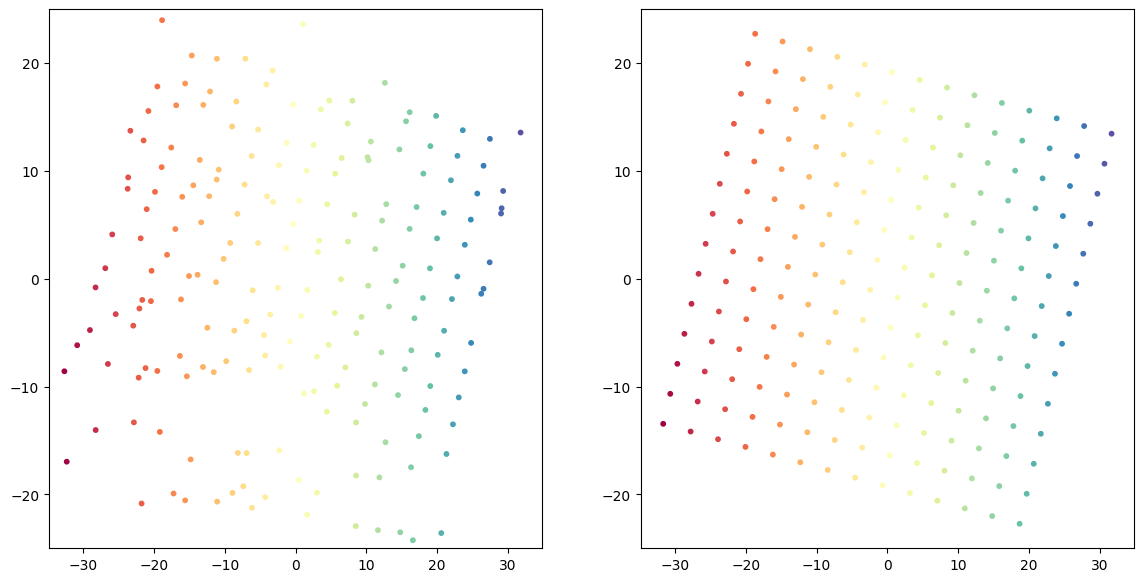

In [80]:
ld_embedding = mcu.reduce_dimensions(q)
regression_matrix = mcu.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

rre = mcu.compute_rre(ld_embedding, reconstructed_y)
mcu.plot_rre_heatmap(rre, reconstructed_y)
print(np.median(rre))
mcu.plot_two_embeddings(ld_embedding, reconstructed_y)

In [84]:
reload(cyl)
test_control_vars = cyl.get_random_control_vars(1000)
test_rolls = cyl.generate_array_of_cylinders(test_control_vars, noise_level=0.05, num_points=200)
x_opts = []
for (roll, control_var) in zip(test_rolls, test_control_vars):
    x_opt, x_err = mcu.predictive_optimization(roll, centered_y, ld_embedding, regression_matrix, y_means, y_scaler, k)
    x_opt = x_opt * x_stds + x_means
    # x_err = 0
    # x_opt = (random.random()*10, random.random()*10)
    x_opts.append(x_opt)
    print("-----------")
    print(f"x_opt  = {x_opt}, x_err = {x_err}")
    print(f"x_real = {control_var}")

x_ops = np.array(x_opts)
test_control_vars = np.array(test_control_vars)

-----------
x_opt  = [6.94360322 2.83648852], x_err = 3.646317560627671e-15
x_real = [7.816792544097523, 0.8225316426685481]
-----------
x_opt  = [3.99041087 4.78528051], x_err = 3.8479528236019926e-15
x_real = [1.6404128702130083, 5.390225378448447]
-----------
x_opt  = [8.7198442  8.47101553], x_err = 9.148323397119114e-19
x_real = [7.540612146055113, 9.0367121890152]
-----------
x_opt  = [6.03439467 4.5098913 ], x_err = 7.86092165224443e-15
x_real = [7.887508601673044, 3.5281965211690114]
-----------
x_opt  = [4.70819336 3.88033821], x_err = 6.437767674860988e-15
x_real = [8.010193714777046, 3.9235573502443675]
-----------
x_opt  = [5.43945353 4.24926906], x_err = 5.049912467702256e-15
x_real = [2.007748293961761, 6.4540598599355405]
-----------
x_opt  = [3.75147875 4.54614964], x_err = 4.051231022865283e-15
x_real = [0.6821207932840789, 4.940179960659103]
-----------
x_opt  = [7.86531804 5.80628055], x_err = 4.004028140711823e-15
x_real = [6.40566395542702, 6.618715707323037]
-----

[ 2.19510408  2.42661264  1.30789945  2.0970827   3.30228318  4.07893408
  3.09454652  1.67052115  4.75132677  0.82136347  1.30010927  2.18760974
  4.60906096  5.23991648  5.05363117  3.84249355  5.32314352  1.86504194
  3.24950074  5.49482709  6.426683    1.97198929  2.45699542  0.92829623
  6.13955463  7.08104743  1.59143071  1.1779407   6.60828202  4.55883206
  0.95790191  2.53822718  7.15576163  2.08637236  1.24111643  3.80074789
  7.48745178  1.92303563  0.51676569  3.6348591   1.56014511  1.44554974
  4.0348296   0.27608572  5.44450064  1.98732304  1.56783277  1.4152234
  2.33079693  3.53489825  0.80786078  1.04523166  6.22146879  0.8718511
  4.75283994  0.52634743  0.64579383  1.02898162  1.32931721  1.21998216
  6.03597374  2.31238838  3.24148239  1.43372426  2.26711739  1.96300368
  2.68611565  1.71571626  1.03542985  0.94886582  2.97658491  0.81608638
  1.9395478   4.10038766  3.72161594  2.8549283   3.0408111   7.07953001
  1.63607534  1.91237679  1.69843824  1.6144134   1.2

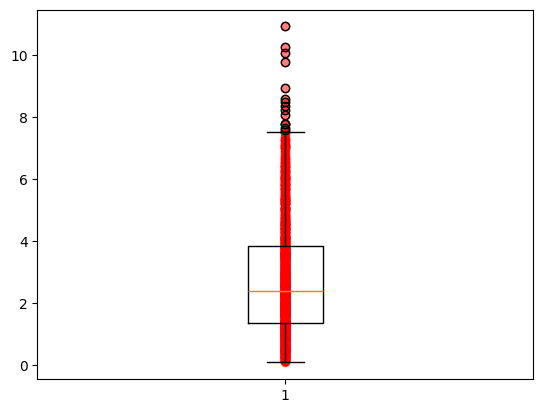

In [85]:
errors = np.linalg.norm(x_opts - test_control_vars, axis = 1)
plt.boxplot(errors)
plt.scatter(np.ones_like(errors), errors, alpha=0.5, color='red')
print(errors)
print(f"Median of errors = {np.median(errors)}")

In [42]:
mcu.k

3